# Load Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Import algorithms

In [3]:
# Importamos los algoritmos a emplear:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
 from sklearn.metrics import accuracy_score

In [5]:
from sklearn.preprocessing import StandardScaler

# Load Dataset

In [6]:

df = pd.read_csv('Absenteeism_at_work.csv', sep = ';')


In [7]:
df.tail()

,ID,"Reason for absence""","Month of absence""",Day of the week,Seasons,Transportation expense,"Distance from Residence to Work""",Service time,Age,"2Work load Average/day """,...,Disciplinary failure,Education,Son,Social drinker,"2Social smoker""",Pet,Weight,Height,Body mass index,"Absenteeism time in hours"""
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271.219,...,0,1,1,0,0,1,77,175,25,0


In [8]:
df.head()

,ID,"Reason for absence""","Month of absence""",Day of the week,Seasons,Transportation expense,"Distance from Residence to Work""",Service time,Age,"2Work load Average/day """,...,Disciplinary failure,Education,Son,Social drinker,"2Social smoker""",Pet,Weight,Height,Body mass index,"Absenteeism time in hours"""
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [9]:
print(df.shape)

(740, 21)


In [10]:
df.columns

Index(['ID', 'Reason for absence"', 'Month of absence"', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work"',
       'Service time', 'Age', '2Work load Average/day "', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       '2Social smoker"', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours"'],
      dtype='object')

# Pre-processing and cleanning data

 **# 1- Fixing messy columns names

In [11]:
#Since the column names are an ‘index’ type, you can use .str on them too. 
#You can fix all these lapses of judgement by chaining together a bunch 
#of these .str functions. Like so:



df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [12]:
df.columns

Index(['id', 'reason_for_absence"', 'month_of_absence"', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work"',
       'service_time', 'age', '2work_load_average/day_"', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       '2social_smoker"', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours"'],
      dtype='object')

* Rename columns with quotation marks*


In [13]:


renacol = {'ID':'id','reason_for_absence"':'reason_for_absence', 'month_of_absence"':'month_of_absence', 
           'day_of_the_week':'day_of_the_week','seasons':'seasons', 'transportation_expense':'transportation_expense',
           'distance_from_residence_to_work"':'distance_from_residence_to_work', 'service_time':'service_time', 
           'age':'age', '2work_load_average/day_"':'work_load_average/day', 'hit_target':'hit_target',
           'disciplinary_failure':'disciplinary_failure', 'education':'education', 'son':'son', 
           'social_drinker':'social_drinker', '2social_smoker"':'social_smoker', 'pet':'pet', 'weight': 'weight',
           'height':'height', 'body_mass_index':'body_mass_index', 'absenteeism_time_in_hours"':'absenteeism_time_in_hours'}



In [14]:
df = df.rename(columns=renacol)
df

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [15]:
df.columns

Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average/day', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours'],
      dtype='object')

In [16]:
freq= df.groupby('disciplinary_failure')
freq['absenteeism_time_in_hours'].count()

disciplinary_failure
0    700
1     40
Name: absenteeism_time_in_hours, dtype: int64

In [17]:
df.columns


Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average/day', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours'],
      dtype='object')

# Data Visualize 

1- Basic Statistic - Analyze 

In [18]:
df.isnull().sum()

id                                 0
reason_for_absence                 0
month_of_absence                   0
day_of_the_week                    0
seasons                            0
transportation_expense             0
distance_from_residence_to_work    0
service_time                       0
age                                0
work_load_average/day              0
hit_target                         0
disciplinary_failure               0
education                          0
son                                0
social_drinker                     0
social_smoker                      0
pet                                0
weight                             0
height                             0
body_mass_index                    0
absenteeism_time_in_hours          0
dtype: int64

There is no raws with missing data . 

In [19]:
df.describe()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [20]:
df.duplicated().sum #good result 

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
735    False
736    False
737    False
738    False
739    False
Length: 740, dtype: bool>

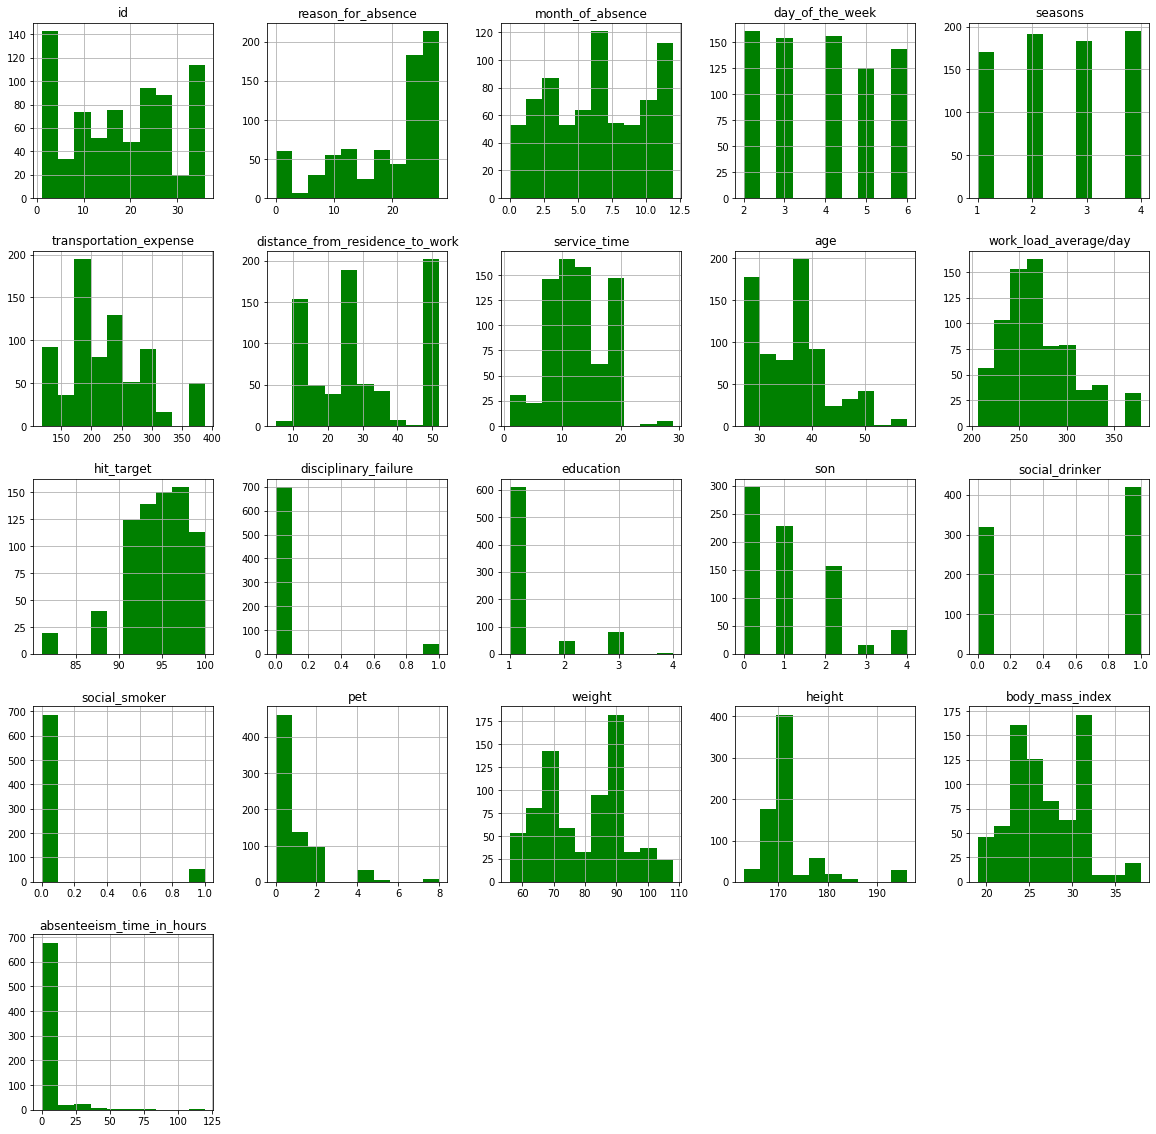

In [21]:
# Visulazing the distibution of the data for every feature
df.hist(linewidth=1, histtype='stepfilled', facecolor='g', figsize=(20, 20));

In [22]:
# Frequencies

In [23]:
freq= df.groupby('disciplinary_failure')
freq['absenteeism_time_in_hours'].count()

disciplinary_failure
0    700
1     40
Name: absenteeism_time_in_hours, dtype: int64

In [24]:
freq= df.groupby('reason_for_absence')
freq['absenteeism_time_in_hours'].count()

reason_for_absence
0      43
1      16
2       1
3       1
4       2
5       3
6       8
7      15
8       6
9       4
10     25
11     26
12      8
13     55
14     19
15      2
16      3
17      1
18     21
19     40
21      6
22     38
23    149
24      3
25     31
26     33
27     69
28    112
Name: absenteeism_time_in_hours, dtype: int64

In [25]:


v=df[df['absenteeism_time_in_hours']==0].count()
print(v)

id                                 44
reason_for_absence                 44
month_of_absence                   44
day_of_the_week                    44
seasons                            44
transportation_expense             44
distance_from_residence_to_work    44
service_time                       44
age                                44
work_load_average/day              44
hit_target                         44
disciplinary_failure               44
education                          44
son                                44
social_drinker                     44
social_smoker                      44
pet                                44
weight                             44
height                             44
body_mass_index                    44
absenteeism_time_in_hours          44
dtype: int64


In [26]:
#  Mean in absenteeism

df['absenteeism_time_in_hours'].mean()


6.924324324324324

In [27]:
# resaons for absence group by absence in hours


r= df.groupby('reason_for_absence')
r[ 'absenteeism_time_in_hours'].count()

reason_for_absence
0      43
1      16
2       1
3       1
4       2
5       3
6       8
7      15
8       6
9       4
10     25
11     26
12      8
13     55
14     19
15      2
16      3
17      1
18     21
19     40
21      6
22     38
23    149
24      3
25     31
26     33
27     69
28    112
Name: absenteeism_time_in_hours, dtype: int64

In [28]:
# Build an array for absent group by reasons frequency 

arr=r['absenteeism_time_in_hours'].count()
arr=np.array(arr)
print(arr)

[ 43  16   1   1   2   3   8  15   6   4  25  26   8  55  19   2   3   1
  21  40   6  38 149   3  31  33  69 112]


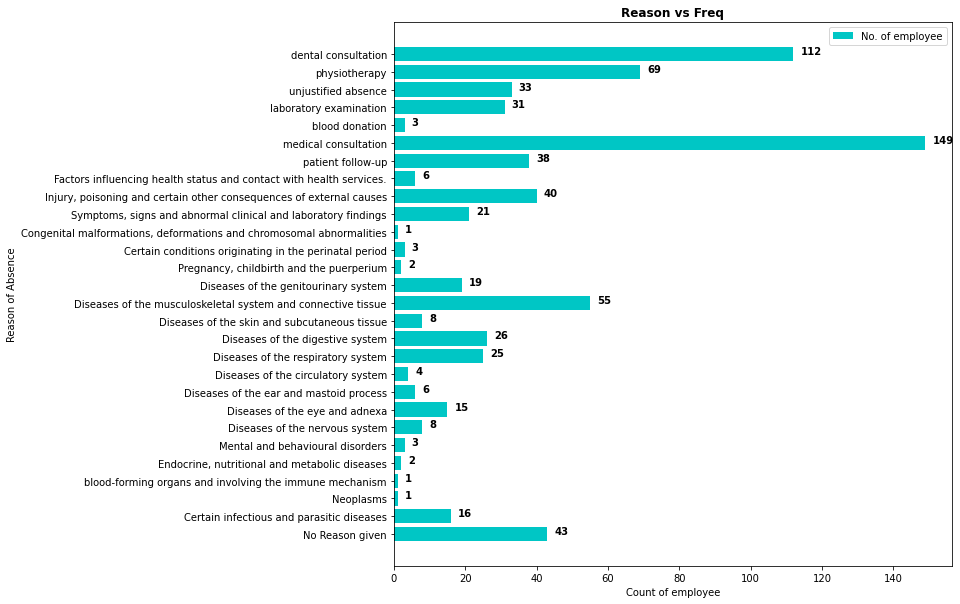

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
table=[
    'No Reason given','Certain infectious and parasitic diseases', 
'Neoplasms', 
'blood-forming organs and involving the immune mechanism', 
'Endocrine, nutritional and metabolic diseases', 
'Mental and behavioural disorders', 
'Diseases of the nervous system', 
'Diseases of the eye and adnexa', 
'Diseases of the ear and mastoid process', 
'Diseases of the circulatory system', 
'Diseases of the respiratory system', 
'Diseases of the digestive system', 
'Diseases of the skin and subcutaneous tissue', 
'Diseases of the musculoskeletal system and connective tissue', 
'Diseases of the genitourinary system',
'Pregnancy, childbirth and the puerperium',
'Certain conditions originating in the perinatal period',
'Congenital malformations, deformations and chromosomal abnormalities', 
'Symptoms, signs and abnormal clinical and laboratory findings', 
'Injury, poisoning and certain other consequences of external causes', 
'Factors influencing health status and contact with health services.',
'patient follow-up',
'medical consultation',
'blood donation',
'laboratory examination',
'unjustified absence',
'physiotherapy',
'dental consultation']
plt.barh(y=np.arange(len(arr)),width=arr,label='No. of employee',color='#00C6C5')
plt.yticks(np.arange(len(arr)),table,rotation=0)
plt.ylabel('Reason of Absence')
plt.xlabel('Count of employee')
plt.title('Reason vs Freq',fontweight='bold')
plt.legend()
for i, v in enumerate(arr):
    ax.text(v+2, i, str(v), color='black',fontweight='bold')
plt.show()

44 employee gave no reasons for their absence

149 employee present  medical consultation to justify their absence

112 employee present dental consultation consultation to justify their absence

In [30]:
reason= {"reason_for_absence":    {"Neoplasms": 1,"blood-forming organs and involving the immune mechanism": 2,
                                  "Endocrine, nutritional and metabolic diseases": 3,
                                  "Mental and behavioural disorders": 4,
                                  "Diseases of the nervous system": 5,
                                  "Diseases of the eye and adnexa": 6,
                                  "Diseases of the ear and mastoid process": 7,
                                  "Diseases of the ear and mastoid process": 8, 
                                  "Diseases of the circulatory system": 9,
                                  "Diseases of the respiratory system": 10,
                                  "Diseases of the digestive system": 11,
                                  "Diseases of the skin and subcutaneous tissue": 12,
                                  "Diseases of the musculoskeletal system and connective tissue": 13,
                                  "Diseases of the genitourinary system": 14,
                                  "Pregnancy child birth and the puerperium": 15,
                                  "Certain conditions originating in the perinatal period": 16,
                                  "Congenital malformations": 17, 
                                  "Deformations and chromosomal abnormalities": 18,
                                  "Symptoms, signs and abnormal clinical and laboratory findings":19, 
                                  "Injury, poisoning and certain other consequences of external causes":20,
                                  "Factors influencing health status and contact with health services": 21,
                                  "patient follow-up": 22,"medical consultation": 23,
                                   "blood donation": 24,
                                  "laboratory examination": 25,
                                  "unjustified absence": 26,"physiotherapy":  27,
                                  "dental consultation": 28,"No Reason given": 29,
                                  "Certain infectious and parasitic diseases": 30}}
                



 


In [31]:
df = df.replace(reason)
df.head()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [32]:
#Function for defing bar text
def barlabels(bars,c='black'):
    for bar in bars:
        yval = round(bar.get_height(),2)
        plt.text(bar.get_x()+0.25,yval, yval,verticalalignment='bottom',color=c,fontweight='bold')

In [33]:
## Calculating absenteism by id frequence
r= df.groupby('id')
r[ 'absenteeism_time_in_hours'].count()

id
1      23
2       6
3     113
4       1
5      19
6       8
7       6
8       2
9       8
10     24
11     40
12      7
13     15
14     29
15     37
16      2
17     20
18     16
19      3
20     42
21      3
22     46
23      8
24     30
25     10
26      5
27      7
28     76
29      5
30      7
31      3
32      5
33     24
34     55
35      1
36     34
Name: absenteeism_time_in_hours, dtype: int64

In [34]:
freq= df.groupby('id')
freq['absenteeism_time_in_hours'].count()

id
1      23
2       6
3     113
4       1
5      19
6       8
7       6
8       2
9       8
10     24
11     40
12      7
13     15
14     29
15     37
16      2
17     20
18     16
19      3
20     42
21      3
22     46
23      8
24     30
25     10
26      5
27      7
28     76
29      5
30      7
31      3
32      5
33     24
34     55
35      1
36     34
Name: absenteeism_time_in_hours, dtype: int64

In [35]:
# Array for graphic  - id and absence 

arr=r['absenteeism_time_in_hours'].count()
arr=np.array(arr)
arr=arr[1:]
arr1=r['absenteeism_time_in_hours'].mean()
arr1=np.array(arr1)
arr1=arr1[1:]

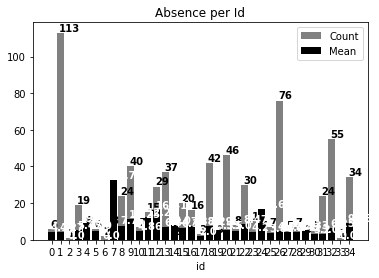

In [36]:
bars=plt.bar(x=np.arange(len(arr)),height=arr,color='grey',label='Count')
bars1=plt.bar(x=np.arange(len(arr)),height=arr1,color='k',label='Mean')
plt.xlabel('id')
plt.xticks(np.arange(len(arr)))
plt.title('Absence per Id')
plt.legend()
barlabels(bars)
barlabels(bars1,'white')


In [37]:
# Calculating absenteism by month_of_absence frequence

r= df.groupby('month_of_absence')
r[ 'absenteeism_time_in_hours'].count()

month_of_absence
0      3
1     50
2     72
3     87
4     53
5     64
6     54
7     67
8     54
9     53
10    71
11    63
12    49
Name: absenteeism_time_in_hours, dtype: int64

In [38]:
# Array for graphic  - id and absence 

arr=r['absenteeism_time_in_hours'].count()
arr=np.array(arr)
arr=arr[1:]
arr1=r['absenteeism_time_in_hours'].mean()
arr1=np.array(arr1)
arr1=arr1[1:]

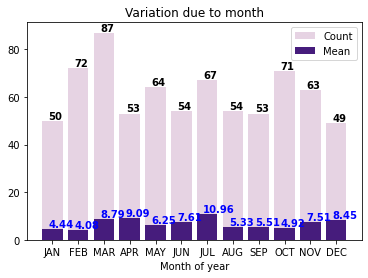

In [39]:
# graphic graphic  - month_of absence and absenteeism 

bars=plt.bar(x=np.arange(len(arr)),height=arr,color='#E6D3E3',label='Count')
bars1=plt.bar(x=np.arange(len(arr)),height=arr1,color='#461C7C',label='Mean')
plt.xlabel('Month of year')
plt.xticks(np.arange(len(arr)),['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
plt.title('Variation due to month')
plt.legend()
barlabels(bars)
barlabels(bars1,'blue')
plt.show()

People often have more hours of absence in march 

People higher time of absence were in july 



[161 154 156 125 144]


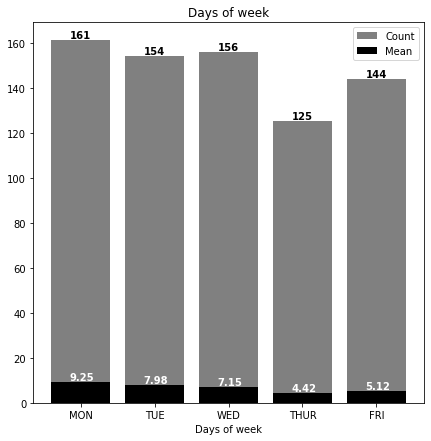

In [40]:
#Plot graphic by days of week 

plt.figure(figsize=(7,7))

# First - 1 Finding frequence of absence group by days of week

r= df.groupby('day_of_the_week')
arr=r['absenteeism_time_in_hours'].count()


# - 2 Build array for absence by days of week 

arr=np.array(arr)
print(arr)
# - 3 An second array for means and absence per hour 

arr1=r['absenteeism_time_in_hours'].mean()
arr1=np.array(arr1)

# Plot 

bars=plt.bar(x=np.arange(len(arr)),height=arr,color='grey',label='Count')
bars1=plt.bar(x=np.arange(len(arr)),height=arr1,color='k',label='Mean')
plt.xlabel('Days of week')
plt.xticks(np.arange(len(arr)),['MON','TUE','WED','THUR','FRI'])
plt.title('Days of week')
plt.legend()
barlabels(bars)
barlabels(bars1,'white')

plt.show()

People often nonappearance at work on monday in 

this company with 9.25 of mean of hours - a longest period of time per week 

Thursday are less absence

[170 192 183 195]


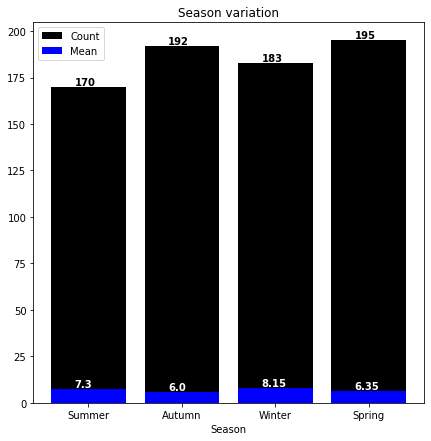

In [41]:
#Plot graphic by season 

plt.figure(figsize=(7,7))


# First - 1 Finding frequence of absence group by season

r= df.groupby('seasons')
arr=r['absenteeism_time_in_hours'].count()

# - 2 Build array for absence by season 

arr=np.array(arr)
print(arr)

# - 3 An second for  the means and absence per hour 


arr1=r['absenteeism_time_in_hours'].mean()
arr1=np.array(arr1)

# Plot 

bars=plt.bar(x=np.arange(len(arr)),height=arr,color='k',label='Count')
bars1=plt.bar(x=np.arange(len(arr)),height=arr1,color='blue',label='Mean')
plt.xlabel('Season')
plt.xticks(np.arange(len(arr)),['Summer','Autumn','Winter','Spring'])
plt.title('Season variation')
plt.legend()
barlabels(bars)
barlabels(bars1,'white')
plt.show()

In Autumn is the most employee failed to the work, but in Winter we found the longest hours of absence in media


[700  40]
disciplinary_failure
0    7.32
1    0.00
Name: absenteeism_time_in_hours, dtype: float64


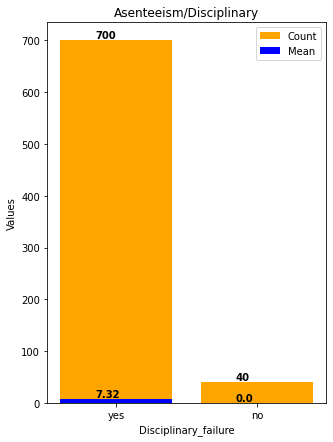

In [42]:
# Plot graphic by disciplinary 
plt.figure(figsize=(5,7))

# absenteism agroup by Disciplinary frequency 
r= df.groupby('disciplinary_failure')
arr=r['absenteeism_time_in_hours'].count()

# Build an array for this
arr=np.array(arr)
print(arr)

# Second array for the mean 

arr1=r['absenteeism_time_in_hours'].mean()

print(arr1)
bars=plt.bar(x=np.arange(len(arr)),height=arr,color='orange',label='Count')
bars1=plt.bar(x=np.arange(len(arr)),height=arr1,color='blue',label='Mean')
plt.xlabel('Disciplinary_failure')
plt.ylabel('Values')
plt.xticks(np.arange(len(arr)),['yes', 'no'])
plt.title('Asenteeism/Disciplinary')
plt.legend()
barlabels(bars)
barlabels(bars1)
plt.show()

The mean of hours for disciplinary absenteeism is 7.32- 

In [43]:
df.columns

Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average/day', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours'],
      dtype='object')

In [44]:
# Frequence of absence in hour group by distance residence to work 

r= df.groupby('distance_from_residence_to_work')
r['absenteeism_time_in_hours'].count()

#r['Absenteeism time in hours'].median()

distance_from_residence_to_work
5       6
10     55
11     26
12     29
13     34
14      9
15      9
16     26
17     15
20     19
22     20
25     54
26    128
27      7
29     14
31     37
35      2
36     40
42      7
45      1
48      5
49      8
50     45
51    120
52     24
Name: absenteeism_time_in_hours, dtype: int64

In [45]:
# Build a list of 8 distance residence max and min from dataframe ( using linspace numpy)

maximum=df['distance_from_residence_to_work'].max()
minimum=df['distance_from_residence_to_work'].min()
bins=list(np.linspace(minimum-1,maximum+1,num=8))
print(bins)

[4.0, 11.0, 18.0, 25.0, 32.0, 39.0, 46.0, 53.0]


In [46]:
# Build dataframe grouping distance two and two 

df1=df.assign(dist=pd.cut(df['distance_from_residence_to_work'], bins=bins))
print(df1['dist'].value_counts())


(46.0, 53.0]    202
(25.0, 32.0]    186
(11.0, 18.0]    122
(18.0, 25.0]     93
(4.0, 11.0]      87
(32.0, 39.0]     42
(39.0, 46.0]      8
Name: dist, dtype: int64


In [47]:
df1

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,dist
0,11,26,7,3,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,4,"(32.0, 39.0]"
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,0,0,98,178,31,0,"(11.0, 18.0]"
2,3,23,7,4,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,"(46.0, 53.0]"
3,7,7,7,5,1,279,5,14,39,239.554,...,1,2,1,1,0,68,168,24,4,"(4.0, 11.0]"
4,11,23,7,5,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,2,"(32.0, 39.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,1,2,1,0,1,90,172,30,8,"(32.0, 39.0]"
736,1,11,7,3,1,235,11,14,37,264.604,...,3,1,0,0,1,88,172,29,4,"(4.0, 11.0]"
737,4,0,0,3,1,118,14,13,40,271.219,...,1,1,1,0,8,98,170,34,0,"(11.0, 18.0]"
738,8,0,0,4,2,231,35,14,39,271.219,...,1,2,1,0,2,100,170,35,0,"(32.0, 39.0]"


In [48]:
df1.dist

0      (32.0, 39.0]
1      (11.0, 18.0]
2      (46.0, 53.0]
3       (4.0, 11.0]
4      (32.0, 39.0]
           ...     
735    (32.0, 39.0]
736     (4.0, 11.0]
737    (11.0, 18.0]
738    (32.0, 39.0]
739    (39.0, 46.0]
Name: dist, Length: 740, dtype: category
Categories (7, interval[float64, right]): [(4.0, 11.0] < (11.0, 18.0] < (18.0, 25.0] < (25.0, 32.0] < (32.0, 39.0] < (39.0, 46.0] < (46.0, 53.0]]

dist
(4.0, 11.0]      5.873563
(11.0, 18.0]    11.844262
(18.0, 25.0]     5.989247
(25.0, 32.0]     5.720430
(32.0, 39.0]    10.714286
(39.0, 46.0]     3.375000
(46.0, 53.0]     5.297030
Name: absenteeism_time_in_hours, dtype: float64


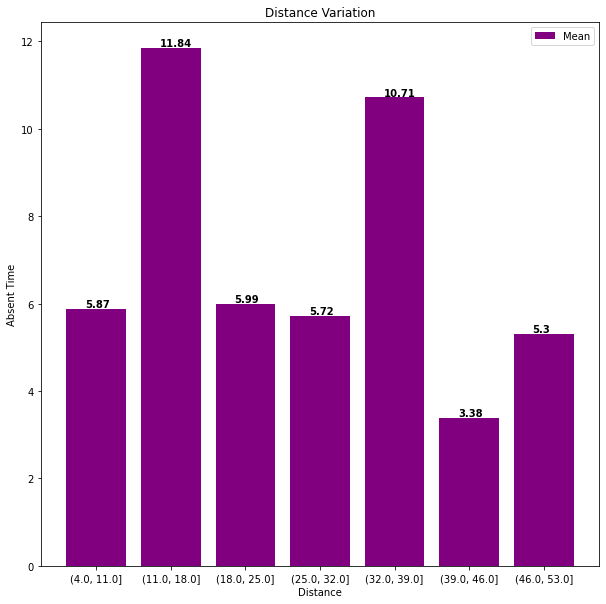

In [49]:
# Plot a absence second distance graphic

plt.figure(figsize=(10,10))
# First frequence absence grouping by distance
r= df1.groupby('dist')
# Second building an array for distance mean 

arr=r['absenteeism_time_in_hours'].mean()
print(arr)


# Plot 

bars=plt.bar(x=np.arange(len(arr)),height=arr,color='purple',label='Mean')
plt.xlabel('Distance')
plt.ylabel('Absent Time')
z=list(arr.index)
plt.xticks(np.arange(len(z)),z)
plt.title('Distance Variation')
plt.legend()
barlabels(bars)
plt.show()

People living at 11 to 18 km from work are who often past more time out at work 

In [50]:
df['absenteeism_time_in_hours']=df['absenteeism_time_in_hours'].apply(lambda x: x/10 if x>=20 else x)

<AxesSubplot:ylabel='Density'>

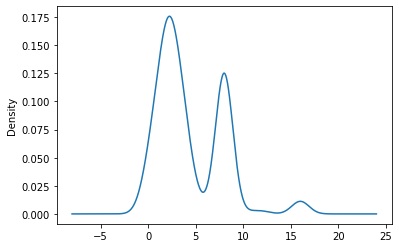

In [51]:
df['absenteeism_time_in_hours'].plot(kind="kde")


In [52]:
df.columns

Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average/day', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours'],
      dtype='object')

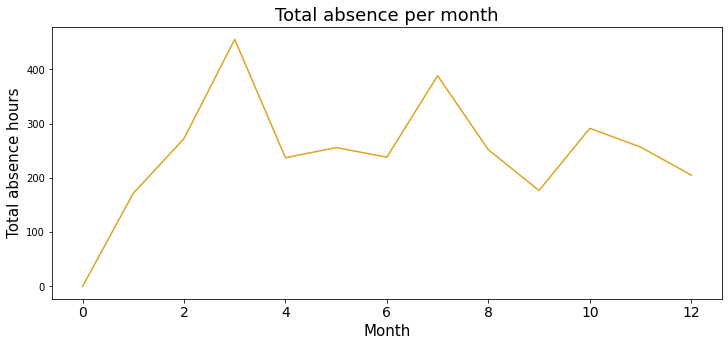

In [53]:
month = pd.DataFrame(df.groupby("month_of_absence")["absenteeism_time_in_hours"].sum().sort_values())


plt.figure(figsize=(12,5))

sns.lineplot(x="month_of_absence",
             y="absenteeism_time_in_hours",
             data=month, color="goldenrod")


plt.xticks(fontsize=14)
plt.xlabel("Month", fontsize=15, color="k")
plt.ylabel("Total absence hours", fontsize=15, color="k")
plt.title("Total absence per month", fontsize=18, color="k");


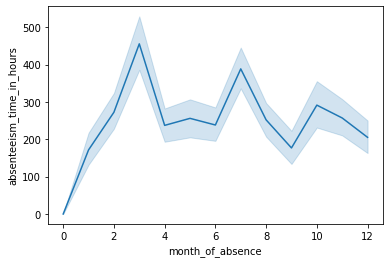

In [54]:
sns.lineplot(x = 'month_of_absence', y =  'absenteeism_time_in_hours', data = df,estimator=sum)
warnings.filterwarnings(action='once')


In [55]:
df.columns

Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average/day', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours'],
      dtype='object')

In [56]:
# Frecuence for each variable 

df[ 'reason_for_absence'].value_counts()

23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
21      6
8       6
9       4
5       3
16      3
24      3
15      2
4       2
3       1
2       1
17      1
Name: reason_for_absence, dtype: int64

In [57]:
# describe body mass 

df['body_mass_index'].describe()


count    740.000000
mean      26.677027
std        4.285452
min       19.000000
25%       24.000000
50%       25.000000
75%       31.000000
max       38.000000
Name: body_mass_index, dtype: float64

In [58]:
cols = df.columns.tolist()
cols.pop(0)


'id'

Text(0.5, 1.0, 'Average')

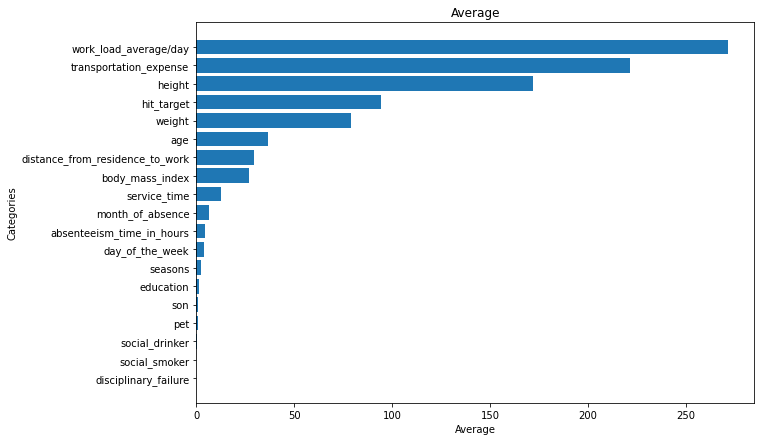

In [59]:
# media per columns

AvgR = df[cols[1:]].mean()
AvgR = AvgR.sort_values()
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(cols[1:])), AvgR.values, align='center')
plt.yticks(np.arange(len(cols[1:])), AvgR.index)
plt.ylabel('Categories')
plt.xlabel('Average')
plt.title('Average')

# Analisis correlacion-

In [60]:
df.columns

Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average/day', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours'],
      dtype='object')

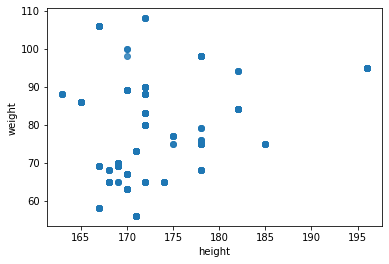

In [61]:
# Gráfico to understand how some variables are related 
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=df.height, y=df.weight, alpha= 0.8)
ax.set_xlabel('height')
ax.set_ylabel('weight');


- This dispersion representation on the graphic seems to be like positive 

In [64]:
# Cálculo de correlación con Pandas
# ==============================================================================
print('Correlación Pearson: ', df['weight'].corr(df['height'], method='pearson'))
print('Correlación spearman: ', df['weight'].corr(df['height'], method='spearman'))
print('Correlación kendall: ', df['weight'].corr(df['height'], method='kendall'))


Correlación Pearson:  0.30680183475759065
Correlación spearman:  0.32277396964101307
Correlación kendall:  0.24984296107747325


<AxesSubplot:>

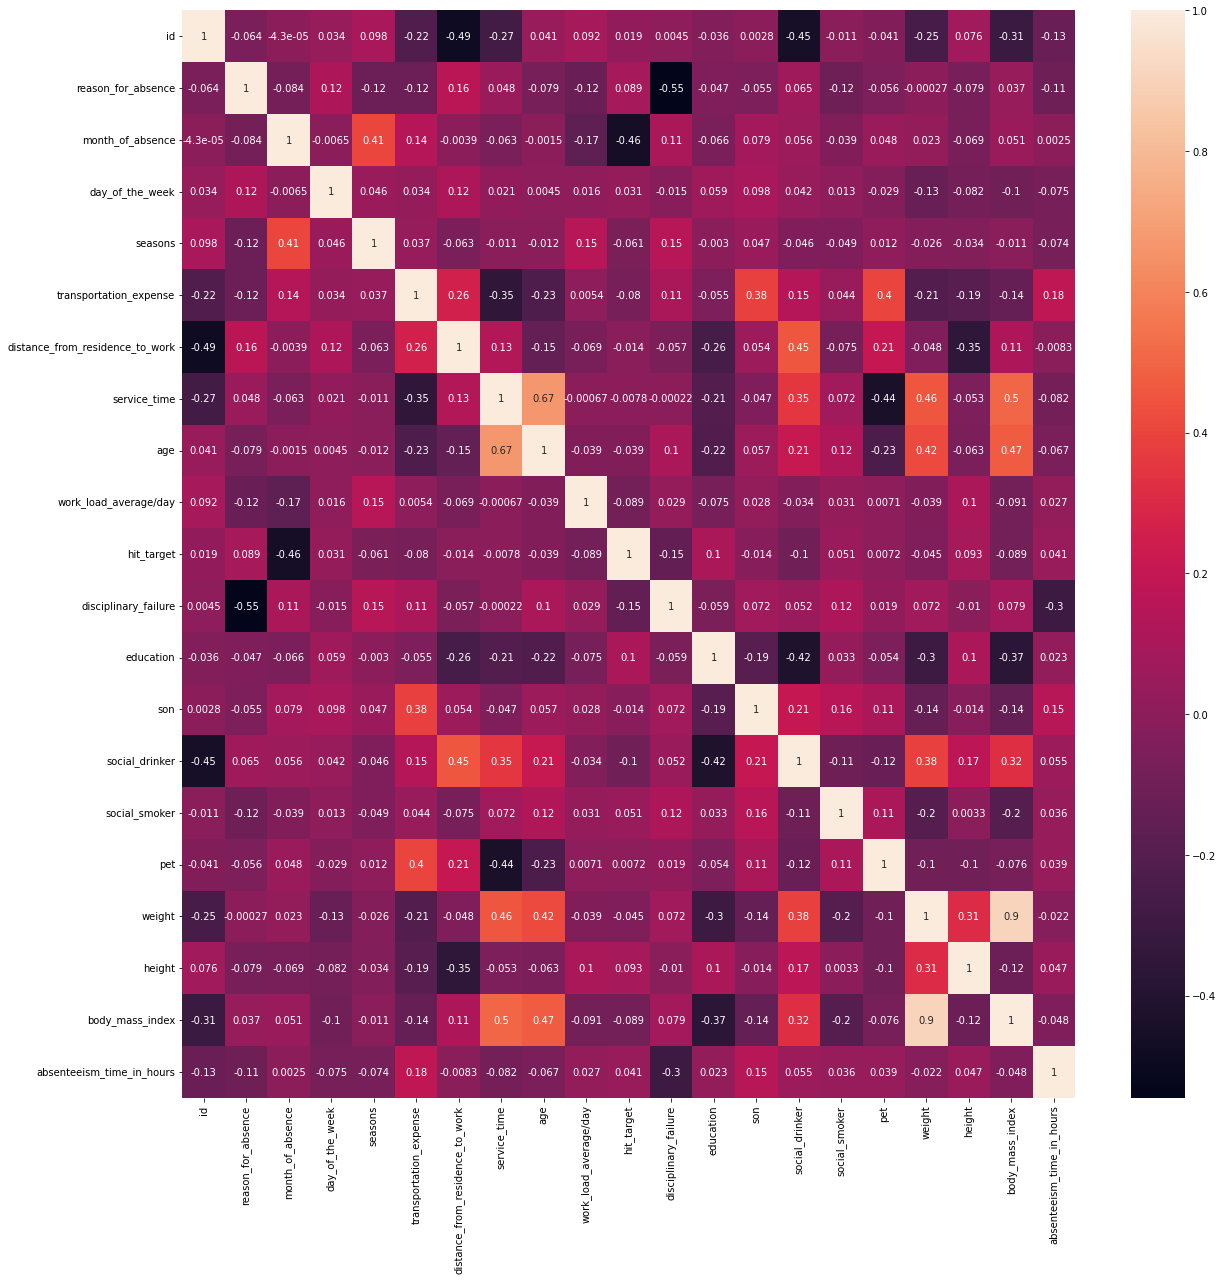

In [65]:
corr_df = df.corr(method='pearson')


fig, ax = plt.subplots(figsize=(20, 20)) 
sns.heatmap(corr_df, annot=True, ax = ax)




# Best ways to correlation visualize

In [67]:
corr_df.style.background_gradient(cmap='coolwarm')

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
id,1.000000,-0.064245,-0.000043,0.034468,0.098495,-0.224163,-0.486160,-0.272704,0.040899,0.092457,0.018789,0.004502,-0.036254,0.002767,-0.451338,-0.010826,-0.041418,-0.254222,0.076363,-0.306924,-0.126244
reason_for_absence,-0.064245,1.000000,-0.083858,0.116319,-0.117925,-0.119381,0.161831,0.048425,-0.078608,-0.123472,0.088943,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.112491
month_of_absence,-0.000043,-0.083858,1.000000,-0.006528,0.407770,0.137525,-0.003887,-0.062862,-0.001520,-0.169989,-0.460453,0.107946,-0.066128,0.079031,0.056226,-0.038603,0.047787,0.023278,-0.068942,0.051046,0.002531
day_of_the_week,0.034468,0.116319,-0.006528,1.000000,0.046493,0.033988,0.118026,0.021252,0.004459,0.015646,0.030986,-0.015120,0.058516,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.075231
seasons,0.098495,-0.117925,0.407770,0.046493,1.000000,0.036995,-0.063108,-0.010904,-0.012089,0.150439,-0.061154,0.151766,-0.002951,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.074454
transportation_expense,-0.224163,-0.119381,0.137525,0.033988,0.036995,1.000000,0.262183,-0.349887,-0.227542,0.005438,-0.080193,0.109222,-0.055065,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.181887
distance_from_residence_to_work,-0.486160,0.161831,-0.003887,0.118026,-0.063108,0.262183,1.000000,0.131730,-0.145886,-0.068677,-0.013865,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.008300
service_time,-0.272704,0.048425,-0.062862,0.021252,-0.010904,-0.349887,0.131730,1.000000,0.670979,-0.000668,-0.007840,-0.000221,-0.213000,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,-0.082225
age,0.040899,-0.078608,-0.001520,0.004459,-0.012089,-0.227542,-0.145886,0.670979,1.000000,-0.039425,-0.039224,0.104304,-0.221882,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,-0.067495
work_load_average/day,0.092457,-0.123472,-0.169989,0.015646,0.150439,0.005438,-0.068677,-0.000668,-0.039425,1.000000,-0.089445,0.029026,-0.074960,0.027820,-0.033713,0.030968,0.007114,-0.038522,0.103315,-0.090709,0.027165


In [68]:
# All variables correlated with absenteeism_time_in_hours

df.corr()['absenteeism_time_in_hours']

id                                -0.126244
reason_for_absence                -0.112491
month_of_absence                   0.002531
day_of_the_week                   -0.075231
seasons                           -0.074454
transportation_expense             0.181887
distance_from_residence_to_work   -0.008300
service_time                      -0.082225
age                               -0.067495
work_load_average/day              0.027165
hit_target                         0.040594
disciplinary_failure              -0.301809
education                          0.022554
son                                0.152687
social_drinker                     0.055462
social_smoker                      0.036040
pet                                0.039149
weight                            -0.021897
height                             0.047187
body_mass_index                   -0.048249
absenteeism_time_in_hours          1.000000
Name: absenteeism_time_in_hours, dtype: float64

In [69]:
# Values Ordered - to better vizualisation from lower to higher.

df.corr()['absenteeism_time_in_hours'].sort_values()

disciplinary_failure              -0.301809
id                                -0.126244
reason_for_absence                -0.112491
service_time                      -0.082225
day_of_the_week                   -0.075231
seasons                           -0.074454
age                               -0.067495
body_mass_index                   -0.048249
weight                            -0.021897
distance_from_residence_to_work   -0.008300
month_of_absence                   0.002531
education                          0.022554
work_load_average/day              0.027165
social_smoker                      0.036040
pet                                0.039149
hit_target                         0.040594
height                             0.047187
social_drinker                     0.055462
son                                0.152687
transportation_expense             0.181887
absenteeism_time_in_hours          1.000000
Name: absenteeism_time_in_hours, dtype: float64

In [70]:
from scipy.stats.stats import pearsonr

df['education'].corr(df['pet'])



-0.05355430414678826

In [71]:
df.columns

Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average/day', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours'],
      dtype='object')

Text(0.5, 0, 'weight')

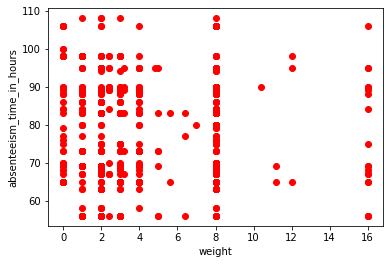

In [72]:
plt.plot(df['absenteeism_time_in_hours'], df['weight'], "ro")
plt.ylabel('absenteeism_time_in_hours')
plt.xlabel('weight')

In [73]:
df.corr()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
id,1.000000,-0.064245,-0.000043,0.034468,0.098495,-0.224163,-0.486160,-0.272704,0.040899,0.092457,...,0.004502,-0.036254,0.002767,-0.451338,-0.010826,-0.041418,-0.254222,0.076363,-0.306924,-0.126244
reason_for_absence,-0.064245,1.000000,-0.083858,0.116319,-0.117925,-0.119381,0.161831,0.048425,-0.078608,-0.123472,...,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.112491
month_of_absence,-0.000043,-0.083858,1.000000,-0.006528,0.407770,0.137525,-0.003887,-0.062862,-0.001520,-0.169989,...,0.107946,-0.066128,0.079031,0.056226,-0.038603,0.047787,0.023278,-0.068942,0.051046,0.002531
day_of_the_week,0.034468,0.116319,-0.006528,1.000000,0.046493,0.033988,0.118026,0.021252,0.004459,0.015646,...,-0.015120,0.058516,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.075231
seasons,0.098495,-0.117925,0.407770,0.046493,1.000000,0.036995,-0.063108,-0.010904,-0.012089,0.150439,...,0.151766,-0.002951,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.074454
transportation_expense,-0.224163,-0.119381,0.137525,0.033988,0.036995,1.000000,0.262183,-0.349887,-0.227542,0.005438,...,0.109222,-0.055065,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.181887
distance_from_residence_to_work,-0.486160,0.161831,-0.003887,0.118026,-0.063108,0.262183,1.000000,0.131730,-0.145886,-0.068677,...,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.008300
service_time,-0.272704,0.048425,-0.062862,0.021252,-0.010904,-0.349887,0.131730,1.000000,0.670979,-0.000668,...,-0.000221,-0.213000,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,-0.082225
age,0.040899,-0.078608,-0.001520,0.004459,-0.012089,-0.227542,-0.145886,0.670979,1.000000,-0.039425,...,0.104304,-0.221882,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,-0.067495
work_load_average/day,0.092457,-0.123472,-0.169989,0.015646,0.150439,0.005438,-0.068677,-0.000668,-0.039425,1.000000,...,0.029026,-0.074960,0.027820,-0.033713,0.030968,0.007114,-0.038522,0.103315,-0.090709,0.027165


/var/folders/2s/pjl2sg357mxgsvkyn1r7tjkm0000gn/T/ipykernel_2586/157648435.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df['service_time'] , y = df['absenteeism_time_in_hours'], palette = "Dark2")


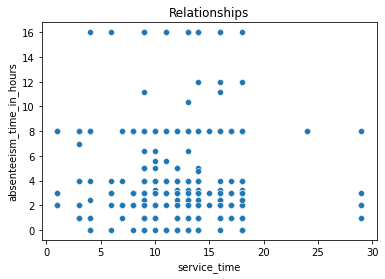

In [74]:
sns.scatterplot(x = df['service_time'] , y = df['absenteeism_time_in_hours'], palette = "Dark2")
plt.title("Relationships")
plt.show()

/var/folders/2s/pjl2sg357mxgsvkyn1r7tjkm0000gn/T/ipykernel_2586/2791612410.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df['body_mass_index'] , y = df['absenteeism_time_in_hours'], palette = "Dark2")


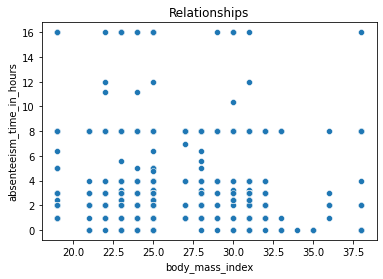

In [75]:
sns.scatterplot(x = df['body_mass_index'] , y = df['absenteeism_time_in_hours'], palette = "Dark2")
plt.title("Relationships")
plt.show()

In [76]:
df['education'].unique(), df.education.nunique()


(array([1, 3, 2, 4]), 4)

In [77]:


df['education'].value_counts()


1    611
3     79
2     46
4      4
Name: education, dtype: int64

In [78]:
# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(df1.select_dtypes(include=numerics).columns)
data_numerical = df1[numerical_vars]
data_numerical.shape

(740, 21)

In [79]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [80]:
corr_features = correlation(df1, 0.80)
len(set(corr_features))

1

In [81]:
corr_features

{'body_mass_index'}

In [82]:
# Correlation between variables 

In [83]:
# Matriz de correlación
# ==============================================================================
corr_matrix = df.corr(method='pearson')
corr_matrix

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
id,1.000000,-0.064245,-0.000043,0.034468,0.098495,-0.224163,-0.486160,-0.272704,0.040899,0.092457,...,0.004502,-0.036254,0.002767,-0.451338,-0.010826,-0.041418,-0.254222,0.076363,-0.306924,-0.126244
reason_for_absence,-0.064245,1.000000,-0.083858,0.116319,-0.117925,-0.119381,0.161831,0.048425,-0.078608,-0.123472,...,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.112491
month_of_absence,-0.000043,-0.083858,1.000000,-0.006528,0.407770,0.137525,-0.003887,-0.062862,-0.001520,-0.169989,...,0.107946,-0.066128,0.079031,0.056226,-0.038603,0.047787,0.023278,-0.068942,0.051046,0.002531
day_of_the_week,0.034468,0.116319,-0.006528,1.000000,0.046493,0.033988,0.118026,0.021252,0.004459,0.015646,...,-0.015120,0.058516,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.075231
seasons,0.098495,-0.117925,0.407770,0.046493,1.000000,0.036995,-0.063108,-0.010904,-0.012089,0.150439,...,0.151766,-0.002951,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.074454
transportation_expense,-0.224163,-0.119381,0.137525,0.033988,0.036995,1.000000,0.262183,-0.349887,-0.227542,0.005438,...,0.109222,-0.055065,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.181887
distance_from_residence_to_work,-0.486160,0.161831,-0.003887,0.118026,-0.063108,0.262183,1.000000,0.131730,-0.145886,-0.068677,...,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.008300
service_time,-0.272704,0.048425,-0.062862,0.021252,-0.010904,-0.349887,0.131730,1.000000,0.670979,-0.000668,...,-0.000221,-0.213000,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,-0.082225
age,0.040899,-0.078608,-0.001520,0.004459,-0.012089,-0.227542,-0.145886,0.670979,1.000000,-0.039425,...,0.104304,-0.221882,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,-0.067495
work_load_average/day,0.092457,-0.123472,-0.169989,0.015646,0.150439,0.005438,-0.068677,-0.000668,-0.039425,1.000000,...,0.029026,-0.074960,0.027820,-0.033713,0.030968,0.007114,-0.038522,0.103315,-0.090709,0.027165


In [84]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
376,weight,body_mass_index,0.904117,0.904117
416,body_mass_index,weight,0.904117,0.904117
155,service_time,age,0.670979,0.670979
175,age,service_time,0.670979,0.670979
32,reason_for_absence,disciplinary_failure,-0.545054,0.545054
232,disciplinary_failure,reason_for_absence,-0.545054,0.545054
406,body_mass_index,service_time,0.499718,0.499718
166,service_time,body_mass_index,0.499718,0.499718
126,distance_from_residence_to_work,id,-0.486160,0.486160
6,id,distance_from_residence_to_work,-0.486160,0.486160
